### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### clean & preprocess data

In [2]:
def clean_and_preprocess_data(data):
    # Separate numeric and categorical columns
    numeric_columns = data.select_dtypes(include=[np.number]).columns
    categorical_columns = data.select_dtypes(exclude=[np.number]).columns

    imputer_numeric = SimpleImputer(strategy='mean')
    data[numeric_columns] = imputer_numeric.fit_transform(data[numeric_columns])

    imputer_categorical = SimpleImputer(strategy='most_frequent')
    data[categorical_columns] = imputer_categorical.fit_transform(data[categorical_columns])

    label_encoder = LabelEncoder()
    data[categorical_columns] = data[categorical_columns].apply(label_encoder.fit_transform)

    scaler = MinMaxScaler()
    data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

    return data

### Function to drop columns

In [3]:
def drop_columns(data, columns_to_drop):
    data = data.drop(columns=columns_to_drop, axis=1)
    return data

### Load data

In [4]:
def load_data(path, format):
    if format == 'csv':
        data = pd.read_csv(path)
    elif format == 'excel':
        data = pd.read_excel(path)
    elif format == 'sql':
        pass
    else:
        raise ValueError("Invalid data format.")
    
    return data

### visualization

In [5]:
def visualize(X, y, model):
    x_column = input("pls enter x-axis: ")
    y_column = input("pls enter y-axis: ")

    if x_column not in X.columns or y_column not in X.columns:
        print("Invalid column names.")
        return

    X_visualization = X[[x_column, y_column]]

    x_min, x_max = X_visualization[x_column].min() - 1, X_visualization[x_column].max() + 1
    y_min, y_max = X_visualization[y_column].min() - 1, X_visualization[y_column].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

    plt.figure(figsize=(10, 7))
    plt.set_cmap(plt.cm.cividis)

    model.fit(X_visualization, y)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_visualization[x_column], X_visualization[y_column], c=y, edgecolors='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f'Decision with {type(model).__name__}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

### Main function

Enter the path to the data file: ../data_set/Social_Network_Ads.csv
Enter the data format (csv, excel, sql): csv
Loaded Data:
    User ID  Gender       Age  EstimatedSalary  Purchased
0  0.232636       1  0.023810         0.029630        0.0
1  0.982732       1  0.404762         0.037037        0.0
2  0.409926       0  0.190476         0.207407        0.0
3  0.147083       0  0.214286         0.311111        0.0
4  0.954801       1  0.023810         0.451852        0.0
Do you want to drop any columns? (yes or no): yes
Enter column names to drop, seprate them with comma(,) User ID
Columns dropped successfully.
Updated dataset after preprocessing:
   Gender       Age  EstimatedSalary  Purchased
0       1  0.023810         0.029630        0.0
1       1  0.404762         0.037037        0.0
2       0  0.190476         0.207407        0.0
3       0  0.214286         0.311111        0.0
4       1  0.023810         0.451852        0.0
Enter the name of the target col: Purchased
Do you want to

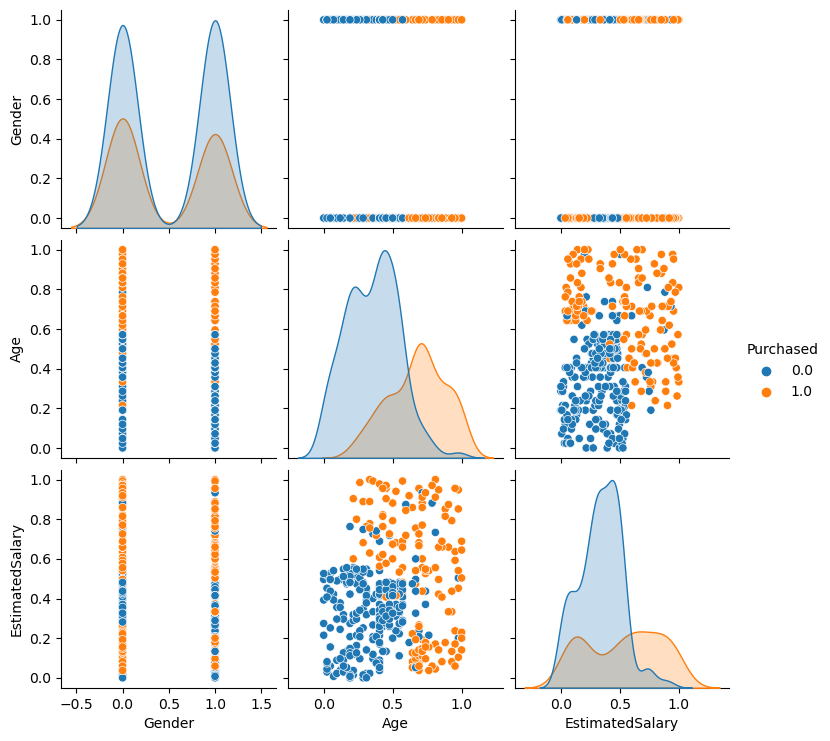

Choose a model (SVM, Logistic Regression, kneighbors, Decision Tree, Random Forest, or 'quit' to exit): SVM
train acc: 0.90625
test acc: 0.875
pls enter x-axis: EstimatedSalary
pls enter y-axis: Age


C:\Users\om440\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


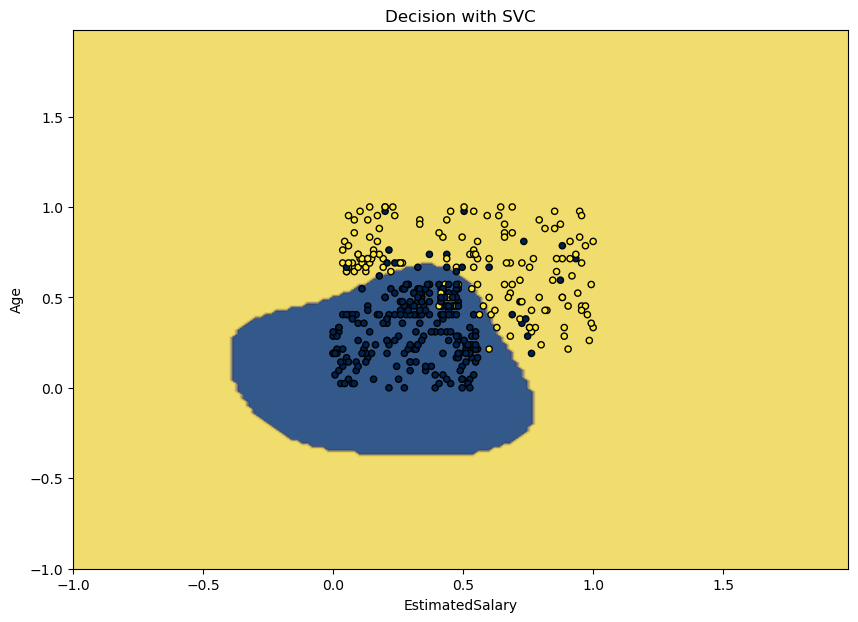

Choose a model (SVM, Logistic Regression, kneighbors, Decision Tree, Random Forest, or 'quit' to exit): Logistic Regression
train acc: 0.809375
test acc: 0.9125
pls enter x-axis: EstimatedSalary
pls enter y-axis: Age


C:\Users\om440\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


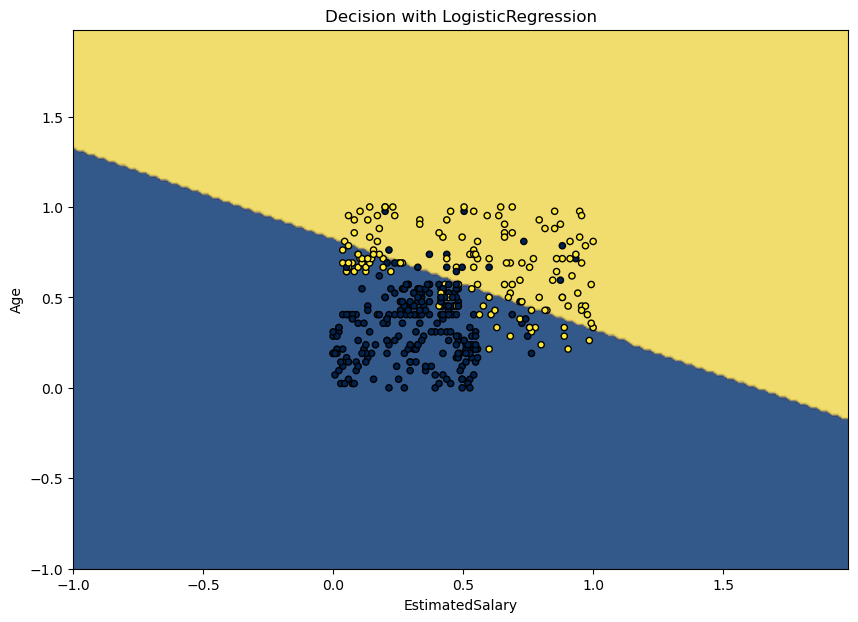

Choose a model (SVM, Logistic Regression, kneighbors, Decision Tree, Random Forest, or 'quit' to exit): kneighbors


C:\Users\om440\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\om440\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

train acc: 0.90625
test acc: 0.9625
pls enter x-axis: EstimatedSalary
pls enter y-axis: Age


C:\Users\om440\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\om440\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


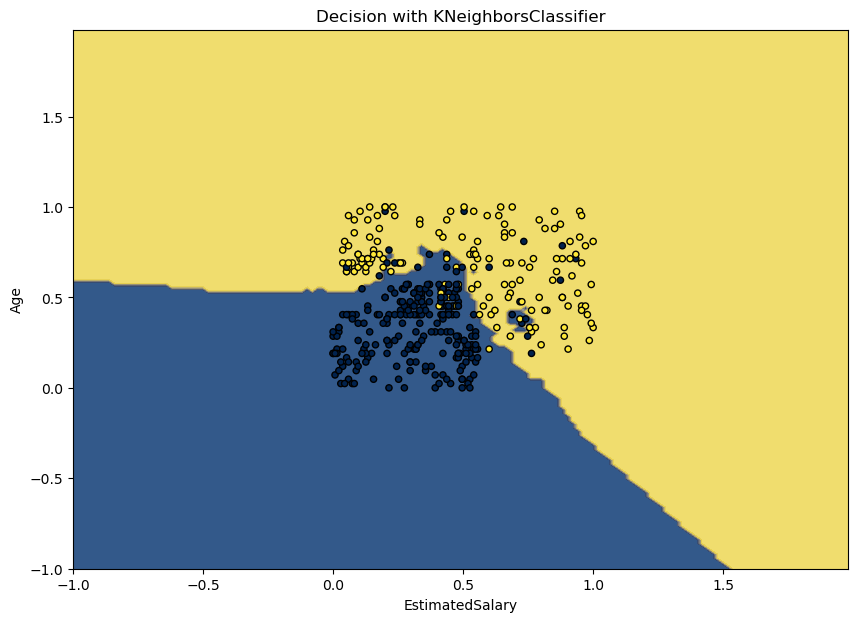

Choose a model (SVM, Logistic Regression, kneighbors, Decision Tree, Random Forest, or 'quit' to exit): Decision Tree
train acc: 0.996875
test acc: 0.8625
pls enter x-axis: EstimatedSalary
pls enter y-axis: Age


C:\Users\om440\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


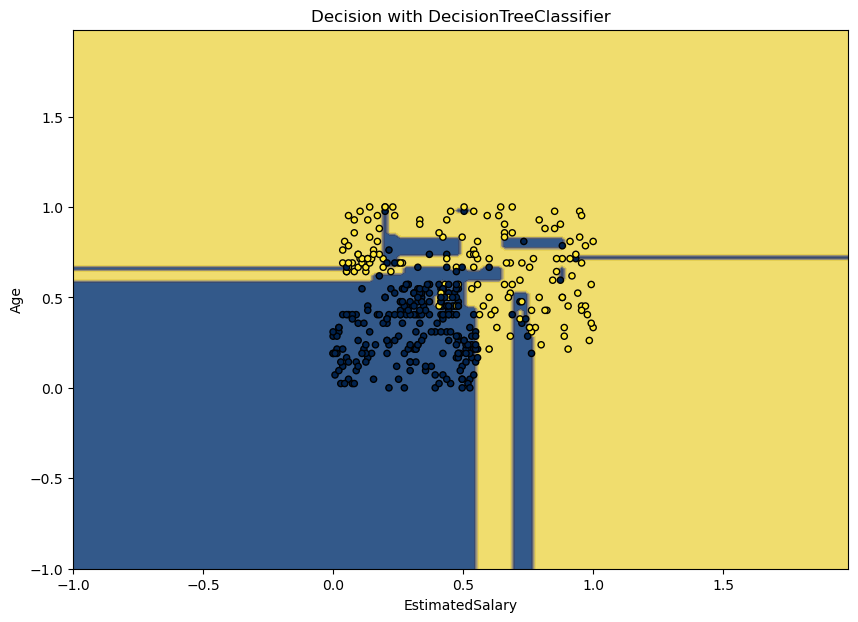

Choose a model (SVM, Logistic Regression, kneighbors, Decision Tree, Random Forest, or 'quit' to exit): Random Forest
train acc: 1.0
test acc: 0.8625
pls enter x-axis: EstimatedSalary
pls enter y-axis: Age


C:\Users\om440\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


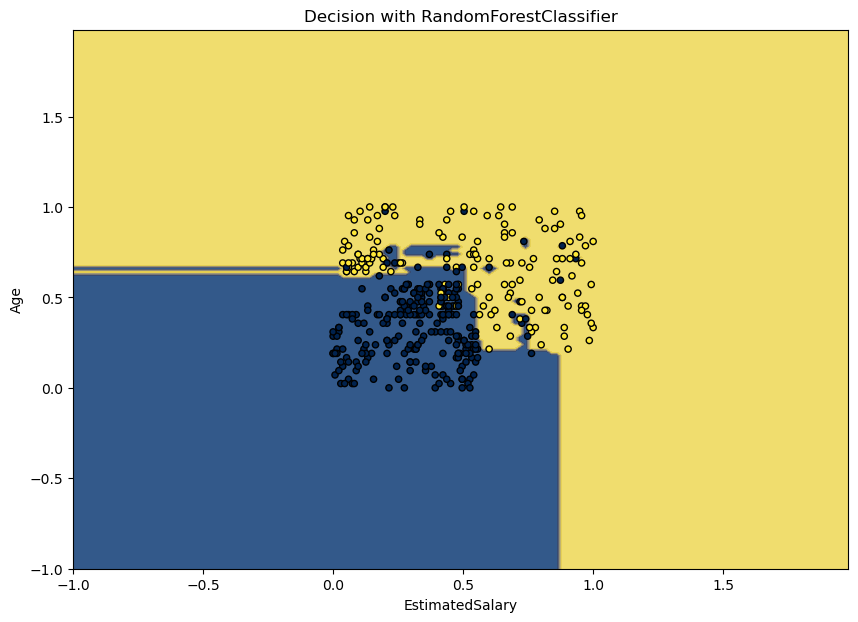

Choose a model (SVM, Logistic Regression, kneighbors, Decision Tree, Random Forest, or 'quit' to exit): quit


In [6]:
def main():
    data_path = input("Enter the path to the data file: ")
    data_format = input("Enter the data format (csv, excel, sql): ")
    
    data = load_data(data_path, data_format)
    
    data = clean_and_preprocess_data(data)

    print("Loaded Data:")
    print(data.head())

    drop_cols = input("Do you want to drop any columns? (yes or no): ")
    if drop_cols == 'yes':
        columns_to_drop = input("Enter column names to drop, seprate them with comma(,) ")
        columns_to_drop = [col.strip() for col in columns_to_drop.split(',')]
        data = drop_columns(data, columns_to_drop)
        print("Columns dropped successfully.")

    print("Updated dataset after preprocessing:")
    print(data.head())

    target_column = input("Enter the name of the target col: ")
    
    X = data.drop(columns=target_column, axis=1)
    y = data[target_column]

    pairplot_target = input("Do you want to create a pairplot with the target column? (yes or no): ")
    if pairplot_target == 'yes':
        sns.pairplot(data, hue=target_column)
        plt.show()

    while True:
        model_name = input("Choose a model (SVM, Logistic Regression, kneighbors, Decision Tree, Random Forest, or 'quit' to exit): ")
        
        if model_name.lower() == 'quit':
            break

        if model_name.lower() == 'svm':
            model = SVC()
        elif model_name.lower() == 'logistic regression':
            model = LogisticRegression()
        elif model_name.lower() == 'kneighbors':
            model = KNeighborsClassifier()
        elif model_name.lower() == 'decision tree':
            model = DecisionTreeClassifier()
        elif model_name.lower() == 'random forest':
            model = RandomForestClassifier()
        else:
            print("Invalid model choice.")
            continue

        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        model.fit(x_train, y_train)
        train_preds = model.predict(x_train)
        test_preds = model.predict(x_test)
        train_acc = accuracy_score(y_train, train_preds)
        print(f"train acc: {train_acc}")
        
        test_acc = accuracy_score(y_test, test_preds)
        print(f"test acc: {test_acc}")
        visualize(X, y, model)

if __name__ == "__main__":
    main()